## Auswertung zum Versuch F82: Koinzidenzspektrometer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
print('Hallo Daniel')
%matplotlib inline


Hallo Daniel


In [2]:
import glob
dateinamen_temp = glob.glob("data/*.txt")
dateinamen = []
for datei in dateinamen_temp:
    dateinamen.append(datei.replace("\\","/"))

In [3]:
liste_temp = []
for i in range(len(dateinamen)):
    with open(dateinamen[i]) as f_input:
        text = [l.replace(",", ".") for l in f_input]


    t = (dateinamen[i][5:-4], np.loadtxt(text))
    liste_temp.append(t)
data = dict(liste_temp)
for key in data:
    print('"'+key+'"')

"Ampitudenspektrum133Ba_cg16"
"Ampitudenspektrum133Ba_cg32"
"Ampitudenspektrum133Ba_cg64_fg7"
"Ampitudenspektrum22Na"
"Ampitudenspektrum54Mn"
"AmpitudenspektrumNacht - Copy"
"AmpitudenspektrumNacht"
"Amplitudenspektrum137Cs"
"Amplitudenspektrum60Co"
"Koinzidenzspektrum137Cs"
"Koinzidenzspektrum137Cs180photons"
"Koinzidenzspektrum137Csbesser"
"Koinzidenzspektrum137CsZufall"
"Koinzidenzspektrum60Co"
"Zeitspektrum137Cs300"
"Zeitspektrum137Cs340"
"Zeitspektrum137Cs380"
"Zeitspektrum137Cs420"
"Zeitspektrum60Co300"
"Zeitspektrum60Co340"
"Zeitspektrum60Co380"
"Zeitspektrum60Co420"


In [4]:
def gaussian(x, mu, sigma, A, c):
    return A*np.exp(-(x - mu)**2 /(2*sigma**2)) + c

In [5]:
def doppelpeakplot(key, l1, u1, c1, l2, u2, c2, end=700):
    #Einlesen der Daten
    amp = data[key]
    chan = np.arange(0,len(amp),1)

    #Zuschneiden auf den ersten Peak
    lower, upper = l1, u1
    x, y = chan[lower:upper], amp[lower:upper]

    #Fitten einer Normalverteilung an die Daten
    popt1, pcov1 = curve_fit(gaussian, x, y, p0=(c1, 40,1000,0), absolute_sigma=True)


    #Plotten der Daten
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    ax[0].set_title('Spektrum')
    ax[0].plot(chan[0:end],amp[0:end])

    #Plotten des ersten Peaks
    ax[1].set_title(key + ', erster Peak')
    ax[1].plot(x,y)
    ax[1].plot(x,gaussian(x, *popt1))

    #Zuschneiden auf den ersten Peak
    lower, upper = l2, u2
    x, y = chan[lower:upper], amp[lower:upper]

    #Fitten einer Normalverteilung an die Daten
    popt2, pcov2 = curve_fit(gaussian, x, y, p0=(c2, 10,1000,0), absolute_sigma=True)
    ax[2].set_title(key + ', zweiter Peak')
    ax[2].plot(x,y)
    ax[2].plot(x,gaussian(x, *popt2))
    plt.show()
    print('peak1 = {0:3.3f} ± {1:3.3f}'.format(popt1[0],np.abs(popt1[1])))
    print('peak2 = {0:3.3f} ± {1:3.3f}'.format(popt2[0],np.abs(popt2[1])))
    return popt1[0], np.abs(popt1[1]), popt2[0], np.abs(popt2[1])


def einzelpeakplot(key, l, u, c, end=700, gaussian=gaussian):
    #Einlesen der Daten
    amp = data[key]
    chan = np.arange(0,len(amp),1)

    #Zuschneiden auf den ersten Peak
    lower, upper = l, u
    x, y = chan[lower:upper], amp[lower:upper]

    #Fitten einer Normalverteilung an die Daten
    popt1, pcov1 = curve_fit(gaussian, x, y, p0=(c, 40,1000,0), absolute_sigma=True)


    #Plotten der Daten
    fig, ax = plt.subplots(1,2, figsize=(14,5))
    ax[0].set_title('Spektrum')
    ax[0].plot(chan[0:end],amp[0:end])

    #Plotten des ersten Peaks
    ax[1].set_title(key + ', erster Peak')
    ax[1].plot(x,y)
    ax[1].plot(x,gaussian(x, *popt1))
    plt.show()
    print('peak1 = {0:3.3f} ± {1:3.3f}'.format(popt1[0],np.abs(popt1[1])))
    return popt1[0], np.abs(popt1[1])


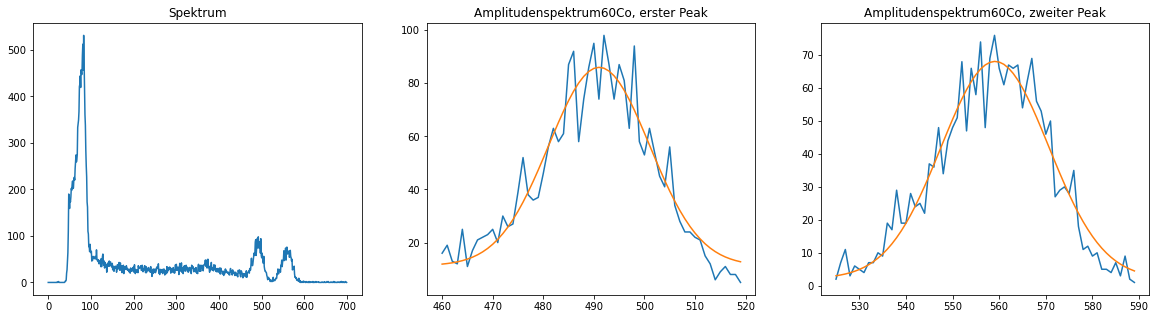

peak1 = 491.048 ± 9.975
peak2 = 559.103 ± 11.546


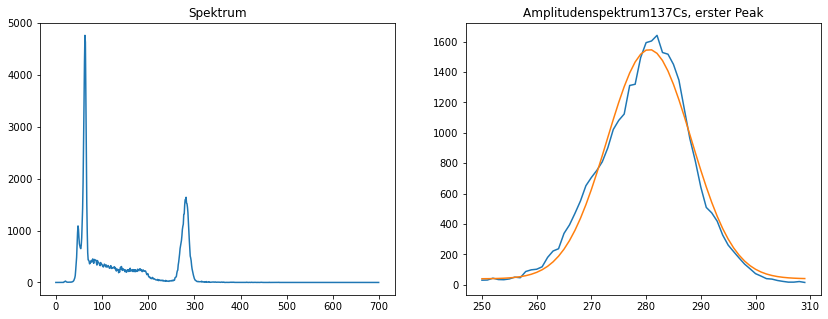

peak1 = 280.579 ± 7.703


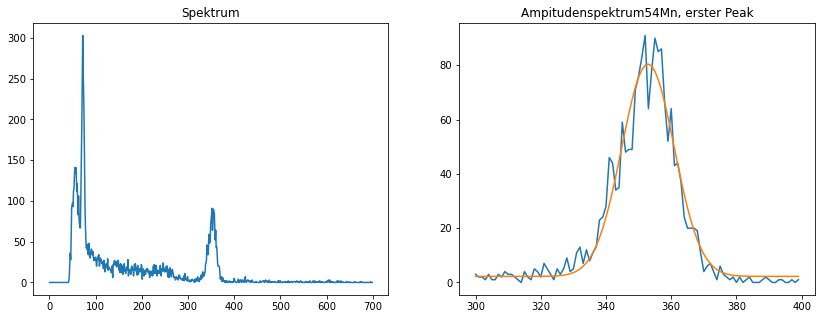

peak1 = 352.881 ± 8.058


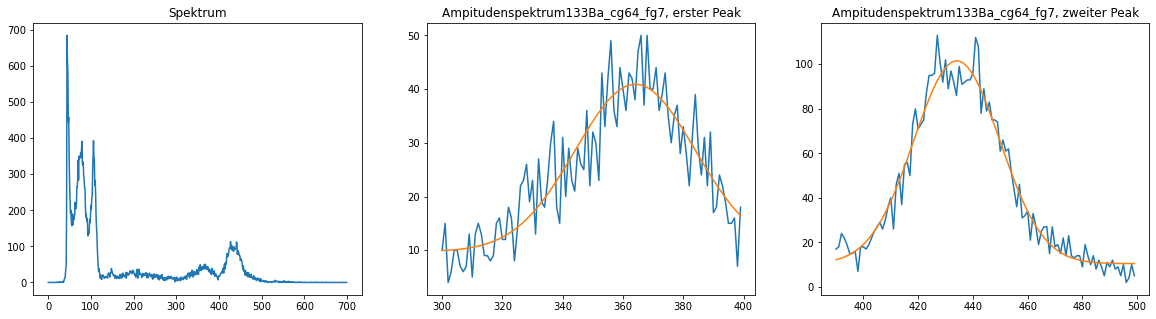

peak1 = 364.083 ± 19.889
peak2 = 434.127 ± 15.722


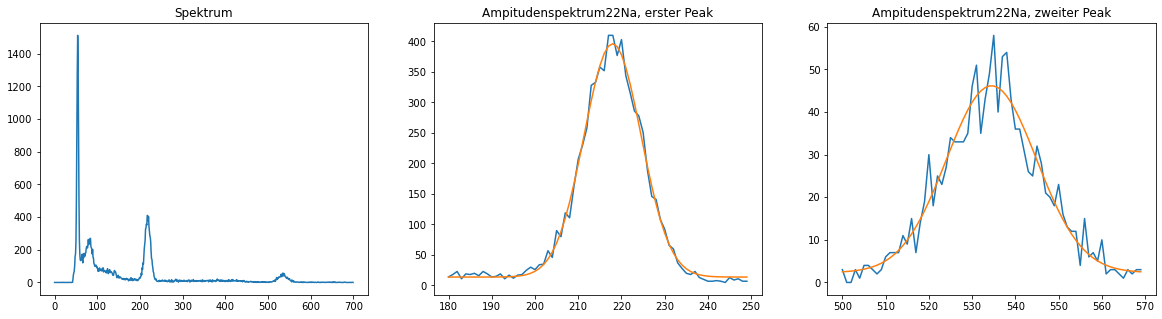

peak1 = 217.942 ± 6.594
peak2 = 534.486 ± 10.412


In [6]:
Co_peak1, Co_dpeak1, Co_peak2, Co_dpeak2 = doppelpeakplot('Amplitudenspektrum60Co', 460, 520, 490, 525, 590, 560)
Cs_peak, Cs_dpeak = einzelpeakplot('Amplitudenspektrum137Cs', 250, 310, 280)
Mn_peak, Mn_dpeak = einzelpeakplot("Ampitudenspektrum54Mn", 300, 400, 350)
Ba_peak1, Ba_dpeak1, Ba_peak2, Ba_dpeak2 = doppelpeakplot("Ampitudenspektrum133Ba_cg64_fg7", 300, 400, 350, 390, 500, 430)
Na_peak1, Na_dpeak1, Na_peak2, Na_dpeak2 = doppelpeakplot("Ampitudenspektrum22Na", 180, 250, 200, 500, 570, 530)

In [7]:
#Bestimmung der Eichgerade
all_peaks =     np.array([Co_peak1, Co_peak2, Cs_peak, Mn_peak, Na_peak2])
all_peaks_err = np.array([Co_dpeak1, Co_dpeak2, Cs_dpeak, Mn_dpeak, Na_dpeak2])
lit_peaks =     np.array([1.17323, 1.33248, 0.6616, 0.8353, 1.2745])

In [8]:
def linear(x, a, b):
    return a*x + b

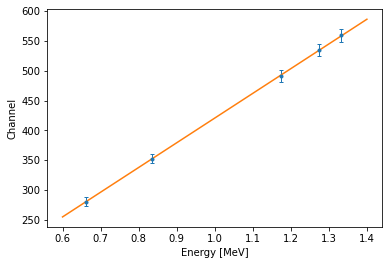

Steigung der Eichgerade: 413.765 ± 15.548 1/MeV
1/Steigung: 2.417e-03 ± 9.082e-05 MeV


In [9]:
plt.errorbar(lit_peaks, all_peaks, yerr=all_peaks_err, marker=".", capsize=2, elinewidth=1, linewidth=0)
plt.ylabel("Channel")
plt.xlabel("Energy [MeV]")
popt, pcov = curve_fit(linear, lit_peaks, all_peaks, sigma=all_peaks_err, absolute_sigma=True)
x=np.linspace(0.6, 1.4, 100)
plt.plot(x, linear(x, *popt))
plt.show()

steigung = popt[0]
steigung_err = np.sqrt(pcov[0,0])
abschnitt = popt[1]
abschnitt_err = np.sqrt(pcov[1][1])
print("Steigung der Eichgerade: {0:3.3f} ± {1:3.3f} 1/MeV".format(steigung, steigung_err))
ch_to_E = 1/steigung
ch_to_E_err = steigung_err/steigung**2
print("1/Steigung: {0:.3e} ± {1:.3e} MeV".format(ch_to_E, ch_to_E_err))

#chiquadrat(lit_peaks, linear, all_peaks, all_peaks_err, popt, 2)

In [10]:
#funktion um den channel in energie umzuwandeln
def energy(channel):
    energy = (channel)/(steigung)
    #d_energy = np.sqrt( ((abschnitt-channel)*steigung_err /steigung**2  )**2 + (abschnitt_err/steigung)**2 )
    return energy#, d_energy

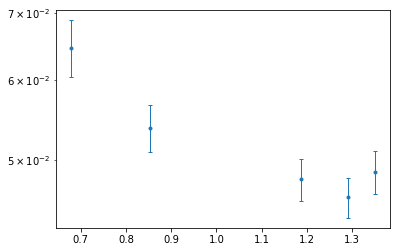

In [11]:
E = energy(all_peaks)
dE = 2.3548 * energy(all_peaks_err)
dE_E = dE/E
ddE_E = dE**2 / E**2

plt.errorbar(E, dE_E, yerr=ddE_E, marker=".", capsize=2, elinewidth=1, linewidth=0)
plt.yscale("log")
plt.show()

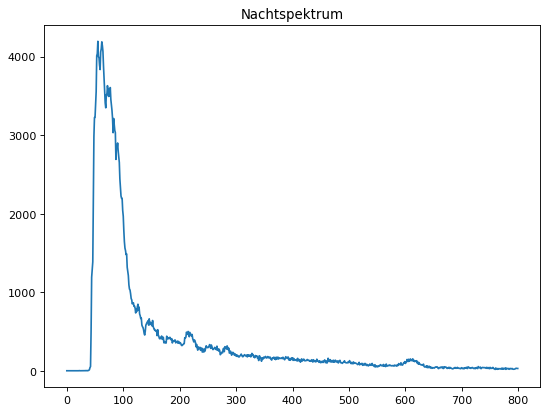

In [12]:
#Betrachtung der Nachtmessung
key = "AmpitudenspektrumNacht"

#Einlesen der Daten
amp = data[key]
chan = np.arange(0,len(amp),1)
engy= energy(chan)

#Plotten der Daten
end = 800
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(chan[0:end], amp[0:end])
plt.title('Nachtspektrum')
plt.show()

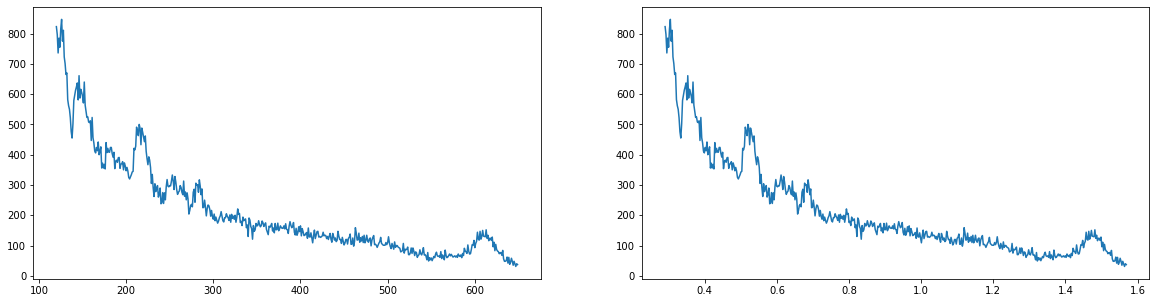

In [13]:
upper, lower = 120, 650
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(chan[upper:lower], amp[upper:lower])
ax[1].plot(energy(chan[upper:lower]), amp[upper:lower])
plt.show()

Peak bei E= 1.47 ± 0.03


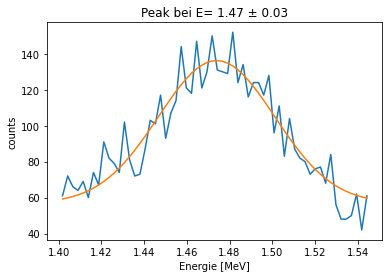

In [14]:
#Zuschneiden auf den ersten Peak

def peak_to_energy(x_rein,y_rein, lower, upper):
    #Ausschneiden und Fit
    x = x_rein[lower:upper]
    y = y_rein[lower:upper]
    en = energy(x)
    popt, pcov = curve_fit(gaussian, en, y, p0=((energy(upper)+energy(lower))/2, 1, 100,0), absolute_sigma=True)
    #Daten in variablen speichern
    mean, sig = popt[0], abs(popt[1])
    
    #Channel in x-Werte umwandeln
    #en, den = energy(x)
    #mean = energy(mean)[0]
    #sig = energy(sig)[0]
    plt.plot(en, y)
    plt.plot(en, gaussian(en, mean, sig, popt[2],popt[3]))
    title = 'Peak bei E= {0:3.2f} ± {1:3.2f}'.format(mean, sig)
    print(title)
    plt.title(title)
    plt.ylabel('counts')
    plt.xlabel('Energie [MeV]')
    return mean, sig

en1, den1 = peak_to_energy(chan, amp, 580, 640)



# Koinzidenzmessungen

## Einfache Koinzidenzschaltung

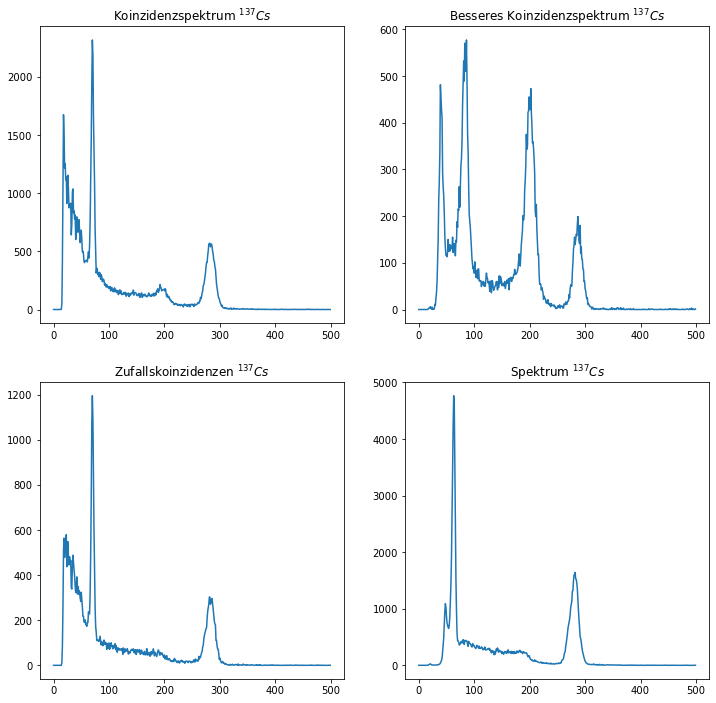

In [63]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

key = "Koinzidenzspektrum137Cs"
amp = data[key]
chan = np.arange(0, len(amp), 1)
ax[0,0].set_title('Koinzidenzspektrum $^{137}Cs$')
ax[0,0].plot(chan[0:500],amp[0:500])

key = "Koinzidenzspektrum137CsZufall"
amp = data[key]
chan = np.arange(0, len(amp), 1)
ax[1,0].set_title('Zufallskoinzidenzen $^{137}Cs$')
ax[1,0].plot(chan[0:500],amp[0:500])

key = "Koinzidenzspektrum137Csbesser"
amp = data[key]
chan = np.arange(0, len(amp), 1)
ax[0,1].set_title('Besseres Koinzidenzspektrum $^{137}Cs$')
ax[0,1].plot(chan[0:500],amp[0:500])

key = "Amplitudenspektrum137Cs"
amp = data[key]
chan = np.arange(0, len(amp), 1)
ax[1,1].set_title('Spektrum $^{137}Cs$')
ax[1,1].plot(chan[0:500],amp[0:500])
plt.show()

### Koinzidenzauflösezeit

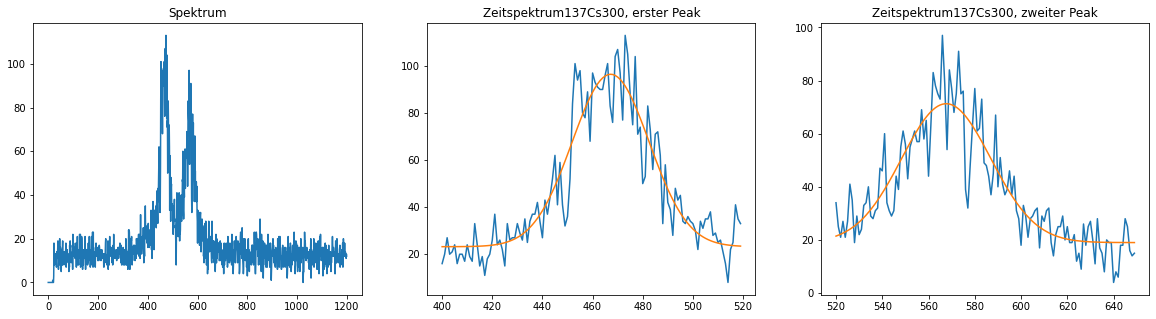

peak1 = 467.211 ± 15.373
peak2 = 567.651 ± 19.242


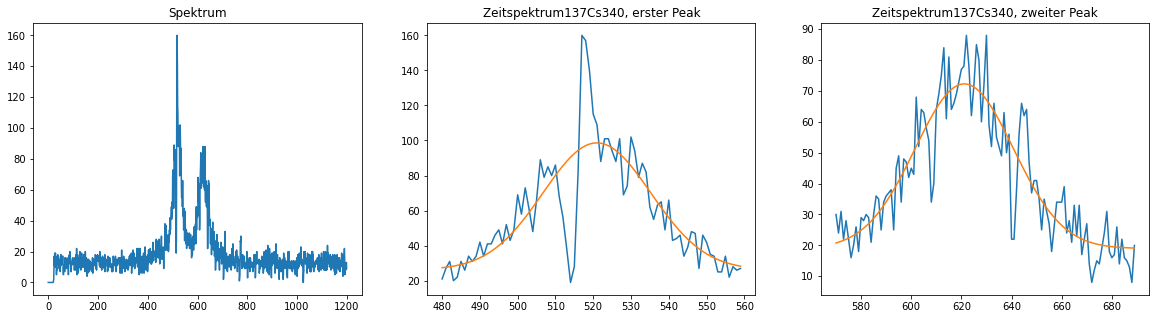

peak1 = 520.975 ± 14.256
peak2 = 621.155 ± 19.611


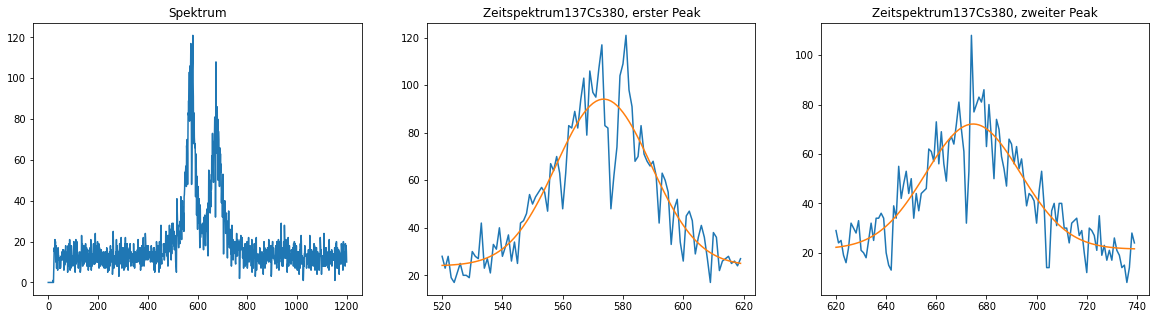

peak1 = 573.594 ± 15.715
peak2 = 674.701 ± 18.874


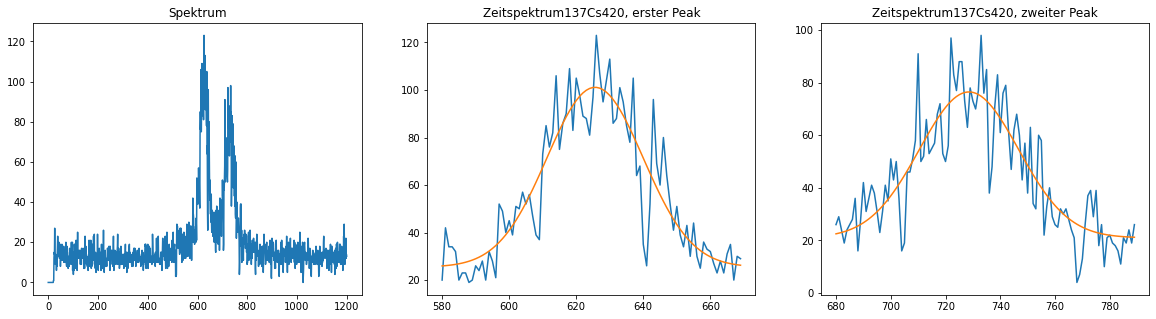

peak1 = 625.615 ± 14.375
peak2 = 728.574 ± 18.093


In [16]:
zeitdaten = np.array([
    doppelpeakplot("Zeitspektrum137Cs300", 400, 520, 550, 520, 650, 560, end=1200),
    doppelpeakplot("Zeitspektrum137Cs340", 480, 560, 500, 570, 690, 600, end=1200),
    doppelpeakplot("Zeitspektrum137Cs380", 520, 620, 550, 620, 740, 650, end=1200),
    doppelpeakplot("Zeitspektrum137Cs420", 580, 670, 650, 680, 790, 730, end=1200)])

In [17]:
print(zeitdaten[:,0])
print(zeitdaten)

[467.21106812 520.97477247 573.59429937 625.61536721]
[[467.21106812  15.37314015 567.65074518  19.24160643]
 [520.97477247  14.25590704 621.15456795  19.61094052]
 [573.59429937  15.71476461 674.70078279  18.87414515]
 [625.61536721  14.37530412 728.57423746  18.09303374]]


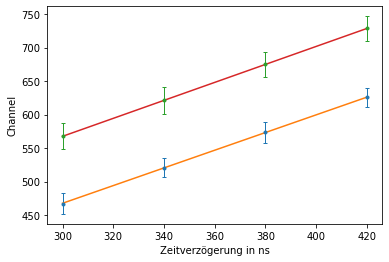

In [18]:
x = np.array([300,340,380,420])

plt.errorbar(x,zeitdaten[:,0], yerr=zeitdaten[:,1], marker=".", capsize=2, elinewidth=1, linewidth=0)
popt1, pcov1 = curve_fit(linear, x, zeitdaten[:,0], sigma=zeitdaten[:,1], absolute_sigma=True)
plt.plot(x, linear(x, *popt1))
plt.errorbar(x,zeitdaten[:,2], yerr=zeitdaten[:,3], marker=".", capsize=2, elinewidth=1, linewidth=0)
popt2, pcov2 = curve_fit(linear, x, zeitdaten[:,2], sigma=zeitdaten[:,3], absolute_sigma=True)
plt.plot(x, linear(x, *popt2))

plt.xlabel("Zeitverzögerung in ns")
plt.ylabel("Channel")
plt.show()

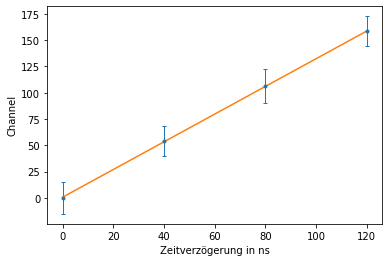

In [48]:
x = np.array([300,340,380,420]) - 300
y1= zeitdaten[:,0] - zeitdaten[0,0]
y2= zeitdaten[:,2] - zeitdaten[0,2]

plt.errorbar(x,y1, yerr=zeitdaten[:,1], marker=".", capsize=2, elinewidth=1, linewidth=0)
popt1, pcov1 = curve_fit(linear, x, y1, sigma=zeitdaten[:,1], absolute_sigma=True)
plt.plot(x, linear(x, *popt1))
# plt.errorbar(x,y2, yerr=zeitdaten[:,3], marker=".", capsize=2, elinewidth=1, linewidth=0)
# popt2, pcov2 = curve_fit(linear, x, y2, sigma=zeitdaten[:,3], absolute_sigma=True)
# plt.plot(x, linear(x, *popt2))

ZeitgeradeCs = popt1

plt.xlabel("Zeitverzögerung in ns")
plt.ylabel("Channel")
plt.show()

In [49]:
def timeCs(channel):
    return (channel- ZeitgeradeCs[1])/ZeitgeradeCs[0]
timeCs(zeitdaten[:,1])

array([11.27300599, 10.42593456, 11.53202116, 10.51645985])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

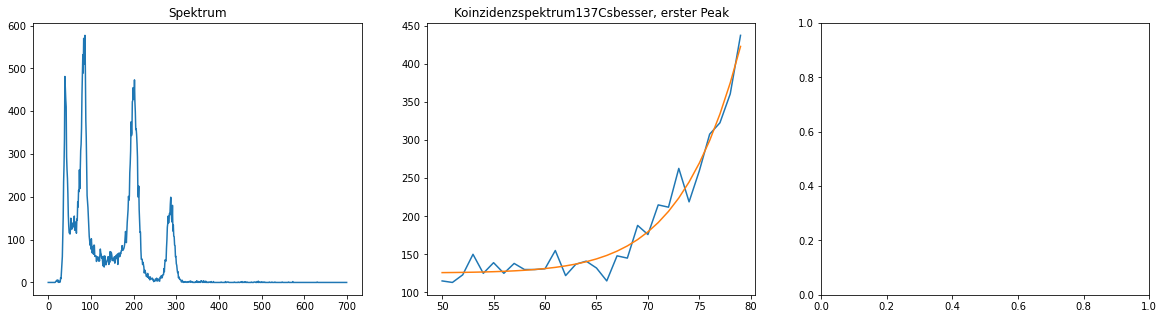

In [69]:
doppelpeakplot("Koinzidenzspektrum137Csbesser", 50, 80, 100, 150, 200, 250)

Cobalt

In [50]:
def doppelgaus(x, mu1, sigma1, A1, mu2, sigma2, A2, c):
    return A1*np.exp(-(x - mu1)**2 /(2*sigma1**2)) + A2*np.exp(-(x - mu2)**2 /(2*sigma2**2)) + c

In [51]:
def doppelgausplot(key, l1, u1, c1, c2, end=700):
    #Einlesen der Daten
    amp = data[key]
    chan = np.arange(0,len(amp),1)

    #Zuschneiden auf den ersten Peak
    lower, upper = l1, u1
    x, y = chan[lower:upper], amp[lower:upper]

    #Fitten einer Normalverteilung an die Daten
    popt1, pcov1 = curve_fit(doppelgaus, x, y, p0=(c1, 10,1000, c2, 10, 1000, 0), absolute_sigma=True)

    #Plotten der Daten
    fig, ax = plt.subplots(1,2, figsize=(20,5))
    ax[0].set_title('Spektrum')
    ax[0].plot(chan[0:end],amp[0:end])

    #Plotten des ersten Peaks
    ax[1].set_title(key + ', erster Peak')
    ax[1].plot(x,y)
    ax[1].plot(x,doppelgaus(x, *popt1))
    plt.show()

    print('peak1 = {0:3.3f} ± {1:3.3f}'.format(popt1[0],np.abs(popt1[1])))
    print('peak2 = {0:3.3f} ± {1:3.3f}'.format(popt1[3],np.abs(popt1[4])))
    return popt1[0], np.abs(popt1[1]), popt1[3], np.abs(popt1[4])

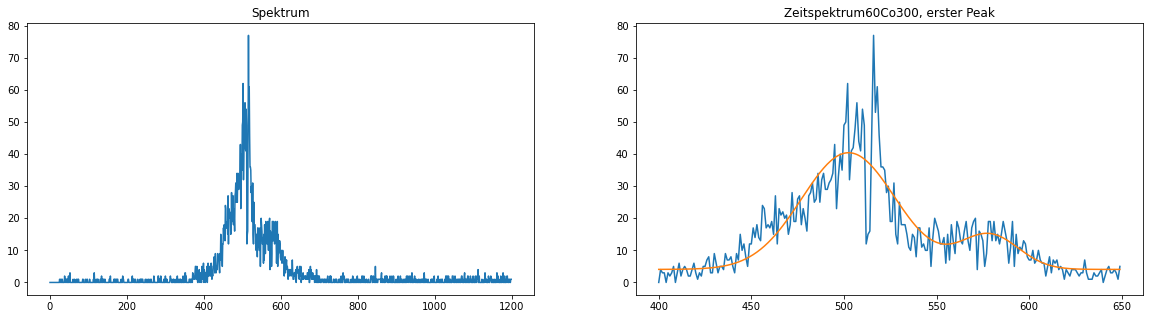

peak1 = 502.514 ± 25.341
peak2 = 578.430 ± 15.810


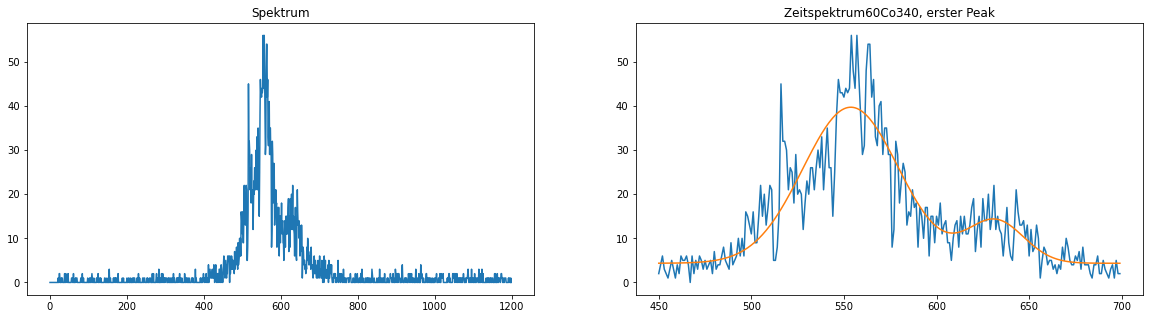

peak1 = 553.723 ± 25.905
peak2 = 631.792 ± 15.366


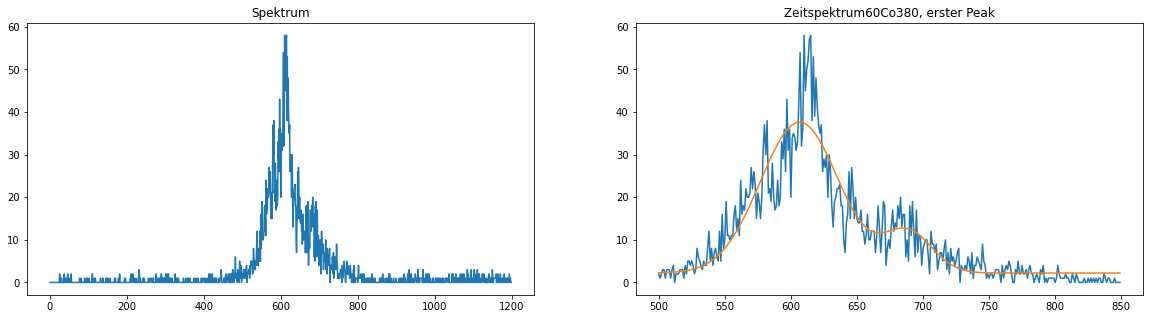

peak1 = 606.572 ± 29.733
peak2 = 688.373 ± 18.427


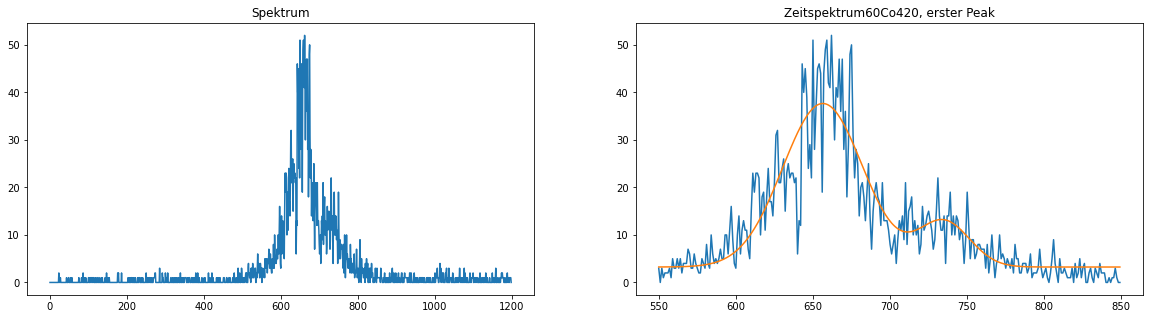

peak1 = 656.388 ± 26.079
peak2 = 734.813 ± 16.855


In [52]:
zeitdatenCo = np.array([
    doppelgausplot("Zeitspektrum60Co300", 400, 650, 500, 560, end=1200),
    doppelgausplot("Zeitspektrum60Co340", 450, 700, 550, 640, end=1200),
    doppelgausplot("Zeitspektrum60Co380", 500, 850, 600, 680, end=1200),
    doppelgausplot("Zeitspektrum60Co420", 550, 850, 650, 730, end=1200)])

In [53]:
zeitdatenCo

array([[502.51351001,  25.34140948, 578.43003735,  15.80966379],
       [553.72254455,  25.90511321, 631.79245996,  15.36618685],
       [606.57246637,  29.73290595, 688.37274404,  18.42705325],
       [656.38791443,  26.07943128, 734.81288735,  16.85467738]])

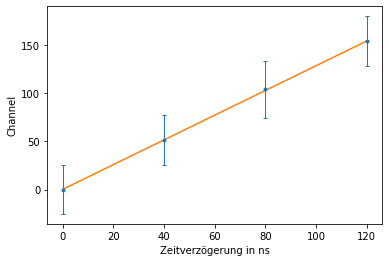

In [54]:
x = np.array([300,340,380,420]) - 300
y1= zeitdatenCo[:,0] - zeitdatenCo[0,0]
y2= zeitdatenCo[:,2] - zeitdatenCo[0,2]

plt.errorbar(x,y1, yerr=zeitdatenCo[:,1], marker=".", capsize=2, elinewidth=1, linewidth=0)
popt1, pcov1 = curve_fit(linear, x, y1, sigma=zeitdatenCo[:,1], absolute_sigma=True)
plt.plot(x, linear(x, *popt1))
# plt.errorbar(x,y2, yerr=zeitdatenCo[:,3], marker=".", capsize=2, elinewidth=1, linewidth=0)
# popt2, pcov2 = curve_fit(linear, x, y2, sigma=zeitdatenCo[:,3], absolute_sigma=True)
# plt.plot(x, linear(x, *popt2))

ZeitgeradeCo = popt1

plt.xlabel("Zeitverzögerung in ns")
plt.ylabel("Channel")
plt.show()

In [55]:
def timeCo(channel):
    return (channel- ZeitgeradeCo[1])/ZeitgeradeCo[0]
timeCo(zeitdatenCo[:,1])

array([19.64709384, 20.08557628, 23.06306216, 20.22117129])